<a href="https://colab.research.google.com/github/Ananya-AJ/Deep-Learning/blob/main/Assignment_3/Assignment_3_part_abcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part: a Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation 

In [36]:
#Imports
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.optim as optim
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset
from typing import Callable


In [2]:
# Generate data
n = 300
dim = 3
x = np.random.uniform(-1, 1, (n, dim))
print('Input shape =', x.shape)

Input shape = (300, 3)


In [3]:
# Initialize weights and bias
weights = np.array([[3, -4, 1]]).T
bias = np.array([8])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = np.einsum('ij, jk -> ik', (x**3),  weights) + np.einsum('ij, jk -> ik', (x**2),  weights) + np.einsum('ij, jk -> ik', x, weights) + bias
print('Function output shape =', y_true.shape)

Weights shape = (3, 1)
Bias shape = (1,)
Function output shape = (300, 1)


In [4]:
#initialize hyperparameters
input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 50

In [5]:
#Linear layer class
# Linear layer class

class Linear:
  def __init__(self, input_dim, output_dim):
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2.0/input_dim)
    self.bias = np.zeros(output_dim)

  def __call__(self, x):
    self.x = x
    return np.einsum('ij, jk -> ik', x, self.weights) + self.bias

  def backward(self, gradient):
    self.weights_gradient = np.einsum('ij, jk -> ik', self.x.T, gradient) #self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = np.einsum('ij, jk -> ik', gradient, self.weights.T) #gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - (lr * self.weights_gradient)
    self.bias = self.bias - (lr * self.bias_gradient)

In [6]:
#error function
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((self.y_pred - self.y_true) ** 2).mean()

  def backward(self):
    self.n = self.y_true.shape[0]
     # gradient of loss function wrt y_pred
    self.gradient = (2.0 * (self.y_pred - self.y_true)) /  n
    return self.gradient

In [7]:
# Non-Linearity using ReLu
class ReLu:
  def __call__(self, input):
    self.input = input
    self.output = np.clip(self.input, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input > 0) * output_gradient
    return self.input_gradient

In [8]:
# Non-linear model

class Model:
  def __init__(self, input_dim, output_dim , hidden_dim):
    self.linear1 = Linear(input_dim, hidden_dim)
    self.relu1 = ReLu()
    self.linear2 = Linear(hidden_dim, hidden_dim)
    self.relu2 = ReLu()
    self.linear3 = Linear(hidden_dim, output_dim)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    l3_gradient = self.linear3.backward(output_gradient)
    r2_gradient = self.relu2.backward(l3_gradient)
    l2_gradient = self.linear2.backward(r2_gradient)
    r1_gradient = self.relu1.backward(l2_gradient)
    l1_gradient = self.linear1.backward(r1_gradient)
    return l1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

In [9]:
# Traning non-linear model
loss_ = []

def fit(x, y_true, model, loss, lr, num_epochs):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_gradient = loss.backward()
    model.backward(loss_gradient)
    model.update(lr)
    loss_.append(loss_value)
  return loss_

In [10]:
loss = MSE()
model = Model(input_dim, output_dim, hidden_dim)
loss_ = fit(x, y_true, model, loss, learning_rate, num_epochs)

Epoch 0, loss 79.60344231576617
Epoch 1, loss 73.30211950133267
Epoch 2, loss 66.5547109341536
Epoch 3, loss 59.51927555407812
Epoch 4, loss 52.29207105469642
Epoch 5, loss 44.93450228807433
Epoch 6, loss 37.47658094298667
Epoch 7, loss 30.105757049484843
Epoch 8, loss 23.114382388923527
Epoch 9, loss 16.949570703775812
Epoch 10, loss 12.218200976941427
Epoch 11, loss 9.076560157389219
Epoch 12, loss 7.091950423724147
Epoch 13, loss 5.855959361587605
Epoch 14, loss 5.097491212563907
Epoch 15, loss 4.60290956630644
Epoch 16, loss 4.286980394609298
Epoch 17, loss 4.059262894406402
Epoch 18, loss 3.8904654610514897
Epoch 19, loss 3.7537148778809555
Epoch 20, loss 3.638025640179237
Epoch 21, loss 3.5397897285729876
Epoch 22, loss 3.4545338545969373
Epoch 23, loss 3.3780733636009983
Epoch 24, loss 3.3077386876198185
Epoch 25, loss 3.2423990736380603
Epoch 26, loss 3.1811859612155766
Epoch 27, loss 3.1232577377155812
Epoch 28, loss 3.0676828992304723
Epoch 29, loss 3.014385413881066
Epoch 30

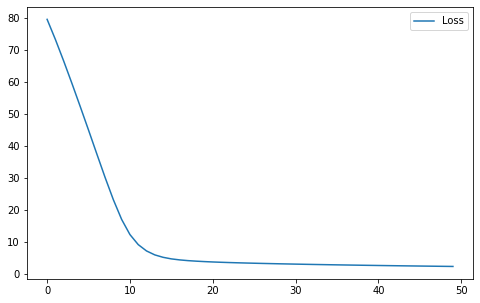

In [11]:
# Plot epoch vs loss
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

From the plot above, we see that the loss is reducing greatly with the increase in the number of epochs. This is because backpropagation updates weights and biases so as to minimize the loss.

In [12]:

loss = MSE()
model = Model(input_dim, output_dim, hidden_dim)

# Train model - one forward and one backward pass for visualization
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(learning_rate)
y_pred = model(x)

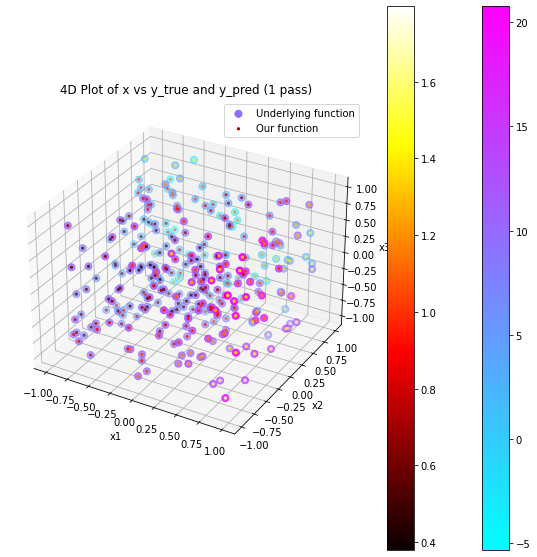

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred, cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

#Part: b Write a colab pytorch from scratch - 3 layer deep neural network for non linear regression withotu using pytorch builtin layer functionality

In [15]:
#generate non linear data
n = 300
dim = 3
x = torch.rand(n, dim).float()
print('Input tensor shape =', x.shape)

Input tensor shape = torch.Size([300, 3])


In [16]:
# Initialize weights and bias

weights = torch.tensor([[3.0, -4.0, 6.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = (torch.einsum('ij, jk -> ik', (x**3),  weights) + torch.einsum('ij, jk -> ik', (x**2),  weights) + torch.einsum('ij, jk -> ik', x, weights) + bias).float()
print('Function output shape =', y_true.shape)

Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([300, 1])


In [17]:
#initialize hyperparameters

input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 100

In [18]:
class Model(torch.nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super(Model, self).__init__()

    # Initialize weights and biases for each of the layers
    self.W1 = torch.nn.Parameter(torch.randn(input_dim, hidden_dim), requires_grad=True)
    self.b1 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.W2 = torch.nn.Parameter(torch.randn(hidden_dim, hidden_dim), requires_grad=True)
    self.b2 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.W3 = torch.nn.Parameter(torch.randn(hidden_dim, output_dim), requires_grad=True)
    self.b3 = torch.nn.Parameter(torch.randn(output_dim), requires_grad=True)

  def forward(self, x):
    h1 = torch.relu(torch.matmul(x, self.W1) + self.b1)
    h2 = torch.relu(torch.matmul(h1, self.W2) + self.b2)
    y_pred = torch.matmul(h2, self.W3) + self.b3
    return y_pred

In [19]:
model = Model(input_dim, output_dim, hidden_dim)

# Loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
loss_ = []
for epoch in range(num_epochs):
  optimizer.zero_grad()
  y_pred = model(x)
  loss_value = loss(y_pred, y_true)
  print(f'Epoch {epoch}, loss {loss_value}')
  loss_value.backward()
  optimizer.step()
  loss_.append(loss_value.detach().numpy())

Epoch 0, loss 153.2393035888672
Epoch 1, loss 132.9968719482422
Epoch 2, loss 114.98157501220703
Epoch 3, loss 99.14527130126953
Epoch 4, loss 85.26821899414062
Epoch 5, loss 73.57952117919922
Epoch 6, loss 63.83352279663086
Epoch 7, loss 55.7723503112793
Epoch 8, loss 49.19221878051758
Epoch 9, loss 43.97849655151367
Epoch 10, loss 39.966365814208984
Epoch 11, loss 36.958740234375
Epoch 12, loss 34.786170959472656
Epoch 13, loss 33.328857421875
Epoch 14, loss 32.4697151184082
Epoch 15, loss 32.11690139770508
Epoch 16, loss 32.13890075683594
Epoch 17, loss 32.4046745300293
Epoch 18, loss 32.783016204833984
Epoch 19, loss 33.14830780029297
Epoch 20, loss 33.388389587402344
Epoch 21, loss 33.4139518737793
Epoch 22, loss 33.17500305175781
Epoch 23, loss 32.64225769042969
Epoch 24, loss 31.825233459472656
Epoch 25, loss 30.74471664428711
Epoch 26, loss 29.470582962036133
Epoch 27, loss 28.06819725036621
Epoch 28, loss 26.588951110839844
Epoch 29, loss 25.105560302734375
Epoch 30, loss 23.6

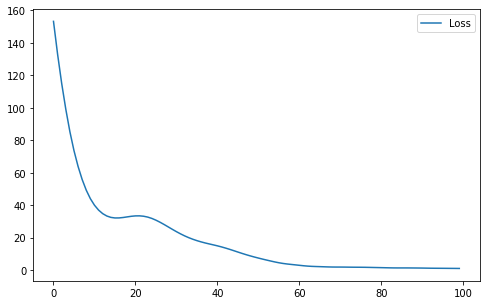

In [21]:
# Plot epoch vs loss

plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

In [22]:
# Initialise model and loss
model = Model(input_dim, output_dim, hidden_dim)

# Loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# One forward and backward pass for visualization
optimizer.zero_grad()
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(127.4850, grad_fn=<MseLossBackward0>)
tensor(96.5201, grad_fn=<MseLossBackward0>)


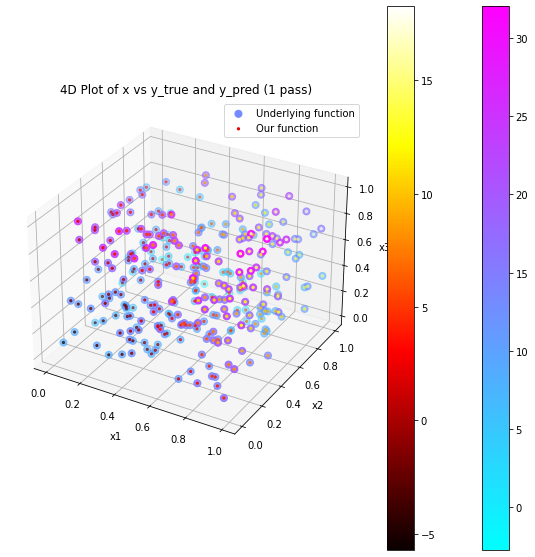

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

#Part:c Write  a colab pytorch classes based - 3 layer deep neural network for non linear regression using pytorch builtin functionality of modules etc.,. backprop etc.

In [25]:
# Generate non-linear data
n = 300
dim = 3
x = torch.rand(n, dim).float()
print('Input tensor shape =', x.shape)

Input tensor shape = torch.Size([300, 3])


In [26]:
# Initialize weights and bias
weights = torch.tensor([[3.0, -4.0, 6.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = (torch.einsum('ij, jk -> ik', (x**3),  weights) + torch.einsum('ij, jk -> ik', (x**2),  weights) + torch.einsum('ij, jk -> ik', x, weights) + bias).float()
print('Function output shape =', y_true.shape)

Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([300, 1])


In [27]:
input_dim = dim
output_dim = 1
hidden_dim = 32

learning_rate = 0.01
num_epochs = 100

In [28]:
# Non-linear model

class Model(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, hidden_dim)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

In [29]:
def torch_fit(x, y_true, model, loss, optimizer, lr, num_epochs):
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x)
    loss_value = loss(y_pred_tensor, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward()
    optimizer.step()

In [30]:
loss = nn.MSELoss()
model = Model(input_dim, output_dim, hidden_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
# Train model

torch_fit(x, y_true, model, loss, optimizer, learning_rate, num_epochs)

Epoch 0, loss 239.8257293701172
Epoch 1, loss 220.86526489257812
Epoch 2, loss 198.7029571533203
Epoch 3, loss 160.14617919921875
Epoch 4, loss 91.24569702148438
Epoch 5, loss 31.43455696105957
Epoch 6, loss 29.282190322875977
Epoch 7, loss 27.26829719543457
Epoch 8, loss 25.332006454467773
Epoch 9, loss 23.5869140625
Epoch 10, loss 21.87840461730957
Epoch 11, loss 20.605501174926758
Epoch 12, loss 19.277559280395508
Epoch 13, loss 19.345314025878906
Epoch 14, loss 18.741409301757812
Epoch 15, loss 23.221494674682617
Epoch 16, loss 22.57876968383789
Epoch 17, loss 39.15132141113281
Epoch 18, loss 25.061368942260742
Epoch 19, loss 49.653690338134766
Epoch 20, loss 20.402494430541992
Epoch 21, loss 38.7613525390625
Epoch 22, loss 21.648242950439453
Epoch 23, loss 44.279624938964844
Epoch 24, loss 18.571945190429688
Epoch 25, loss 36.89887237548828
Epoch 26, loss 19.150146484375
Epoch 27, loss 39.50508499145508
Epoch 28, loss 17.17400550842285
Epoch 29, loss 34.786346435546875
Epoch 30, l

As the number of epcohs increases, the loss goes down

In [33]:
# Initialize loss and model class objects
loss = nn.MSELoss()
model = Model(input_dim, output_dim, hidden_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# One forward and backward pass for visualization
optimizer.zero_grad()
y_pred_tensor = model(x)
loss_value = loss(y_pred_tensor, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(233.0226, grad_fn=<MseLossBackward0>)
tensor(212.4307, grad_fn=<MseLossBackward0>)


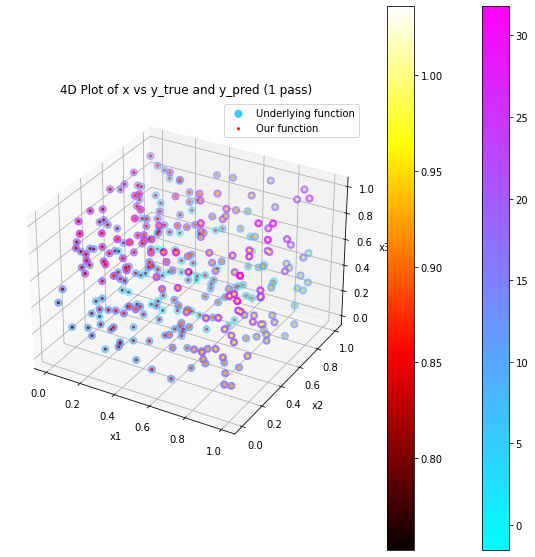

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

As the epochs are increasing the MSE loss reduces showing that the netwrok is learning the underlying function correctly.

Part : d Write  a colab  pytorch lightening version of the same

In [35]:
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 32.9 MB/s eta 0:00:00


In [37]:
# Generate non-linear data

n = 300
dim = 3
x = torch.rand(n, dim).float()
print('Input tensor shape =', x.shape)

Input tensor shape = torch.Size([300, 3])


In [38]:
# Initialize weights and bias
weights = torch.tensor([[2.0, -3.0, 6.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function to learn
y_true = (torch.einsum('ij, jk -> ik', (x**3),  weights) + torch.einsum('ij, jk -> ik', (x**2),  weights) + torch.einsum('ij, jk -> ik', x, weights) + bias).float()
print('Function output shape =', y_true.shape)

Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([300, 1])


In [39]:
# Initialize hyperparamters
input_dim = dim
output_dim = 1
hidden_dim = 16
batch_size= 16

learning_rate = 0.01
num_epochs = 20

In [40]:
data = TensorDataset(x, y_true)
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True)

In [41]:

# Non-linear model

class Model(pl.LightningModule):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, hidden_dim)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def training_step(self, batch):
    x, y_true = batch
    y_pred = self(x)
    loss_value = nn.MSELoss()(y_pred, y_true)
    return loss_value

  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
    return optimizer
     

In [42]:
trainer = pl.Trainer(max_epochs=num_epochs)
model = Model(input_dim, output_dim, hidden_dim)

/usr/local/lib/python3.8/dist-packages/lightning_fabric/accelerators/cuda.py:236: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [43]:
trainer.fit(model, data_loader)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params
-----------------------------------
0 | linear1 | Linear | 64    
1 | relu1   | ReLU   | 0     
2 | linear2 | Linear | 272   
3 | relu2   | ReLU   | 0     
4 | linear3 | Linear | 17    
-----------------------------------
353       Trainable params
0         Non-trainable params
353       Total params
0.001     Total estimated model params size (MB)
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (19) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


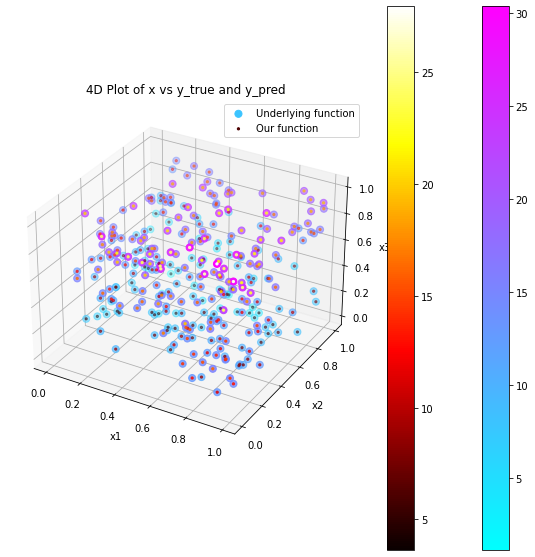

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=model(x).detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred')

plt.legend()
plt.show()
     